# 특성 추출

## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'DejaVu Serif'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

In [ ]:
!pip install mglearn

## 특성 자동 선택
- 일변량 통계 (Univariate statistics)
- 모델 기반 선택 (Model-based selection)
- 반복적 선택 (Iterative selection)  

수많은 x data 중 어떤 것이 좋은지를 알아내는 방법. 그것만 쓰는게 좋잖아?  
가장 좋은 방법은 전문가가 전문 지식으로 걸러내는게 좋긴 함  

---
**특성 자동 선택과 차원 축소는 다른 개념이다.  
특성 자동 선택은 실제 열 중, 사용할 열을 고르는 것이지만, 차원 축소는 기존의 열 데이터를 이용하여 아예 새 열을 만들어 차원을 축소시킨다.**

### 일변량 통계

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 로딩
cancer = load_breast_cancer()

In [ ]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# 의도적으로 노이즈 생성: 50개
rng = np.random.RandomState(123)
noise = rng.normal(size=(len(cancer.data), 50))

# 데이터에 노이즈 특성 추가: 원본특성(30 + 노이즈(50)
X_w_noise = np.hstack([cancer.data, noise])

In [ ]:
#80개의 column이 만들어짐
X_w_noise.shape

(569, 80)

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=123, test_size=0.5)

In [ ]:
# 특성 선택 모델 생성: 일변량 통계 (분산 분석 사용)
select = SelectPercentile(score_func=f_classif, percentile=50)

In [ ]:
# 특성 선택 모델 학습
select.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [ ]:
# 특성 선택 데이터 변환: 적절한 특성(컬럼) 선택
X_train_selected = select.transform(X_train)

print('X_train.shape:', X_train.shape)
print('X_train_selected.shape:', X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


In [ ]:
# 특성 선택 여부 표시 - True가 선택한 column, False가 버린 column
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False,  True])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

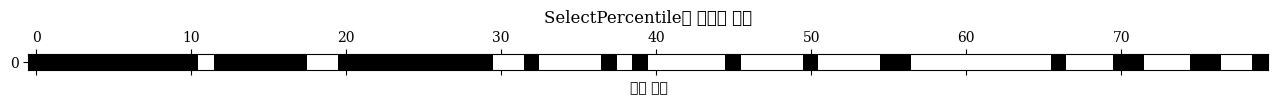

In [ ]:
# True는 검은색, False는 흰색으로 표시
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

plt.title('SelectPercentile이 선택한 특성')
plt.xlabel('특성 번호')
plt.yticks([0])
plt.show()

In [ ]:
#
# 일변량 통계 특성 선택 성능 비교 - Logistic Regression
#

from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환: 특성 선택
X_test_selected = select.transform(X_test)

# LogisticRegression
lr = LogisticRegression(max_iter=5000)

lr.fit(X_train, y_train)
print('전체 특성 사용: {:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print('일변량 통계 특성 선택 적용(일부 특성 사용): {:.3f}'.format(lr.score(X_test_selected, y_test)))

전체 특성 사용: 0.944
일변량 통계 특성 선택 적용(일부 특성 사용): 0.940


컬럼을 많이 줄였는데도 비슷한 결과값이 나왔다면? 엄청난 좋은 결과가 나온거다~

### 모델 기반 특성 선택

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 특성 선택 모델 생성: 모델 기반 특성 선택
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=123), threshold='median')

In [ ]:
# 특성 선택 모델 학습
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=123),
                threshold='median')

In [ ]:
# 특성 선택 데이터 변환: 적절한 특성(컬럼) 선택
X_train_l1 = select.transform(X_train)

print('X_train.shape:   ', X_train.shape)
print('X_train_l1.shape:', X_train_l1.shape)

X_train.shape:    (284, 80)
X_train_l1.shape: (284, 40)


In [ ]:
# 특성 선택 여부 표시
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

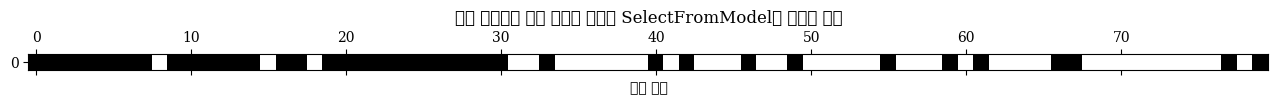

In [ ]:
# True는 검은색, False는 흰색으로 표시
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

plt.title('랜덤 포레스트 분류 모델을 사용한 SelectFromModel이 선택한 특성')
plt.xlabel('특성 번호')
plt.yticks([0])
plt.show()

In [ ]:
#
# 모델 기반 특성 선택 성능 비교 - Logistic Regression
#

from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환: 특성 선택
X_test_l1 = select.transform(X_test)

# LogisticRegression
lr = LogisticRegression(max_iter=5000)

lr.fit(X_train_l1, y_train)
print('모델 기반 특성 선택 적용(일부 특성 사용): {:.3f}'.format(lr.score(X_test_l1, y_test)))

모델 기반 특성 선택 적용(일부 특성 사용): 0.958


### 반복적 특성 선택
- 재귀적 특성 제거 (RFE - Recursive Feature Elimination)  

80개 넣어서 돌려보고  
빼서 70개 넣고 돌려보고... 식으로 계속 반복하며 줄여나가는 방식

In [ ]:
# 특성 선택 모델 생성: 반복적 특성 기반
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=123), n_features_to_select=40)

In [ ]:
%%time
# 특성 선택 모델 학습
select.fit(X_train, y_train)

CPU times: user 11 s, sys: 34.6 ms, total: 11.1 s
Wall time: 12.3 s


RFE(estimator=RandomForestClassifier(random_state=123), n_features_to_select=40)

In [ ]:
# 특성 선택 데이터 변환: 적절한 특성(컬럼) 선택
X_train_rfe = select.transform(X_train)

print('X_train.shape:    ', X_train.shape)
print('X_train_rfe.shape:', X_train_rfe.shape)

X_train.shape:     (284, 80)
X_train_rfe.shape: (284, 40)


In [ ]:
# 특성 선택 여부 표시
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False,  True, False, False, False,  True])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

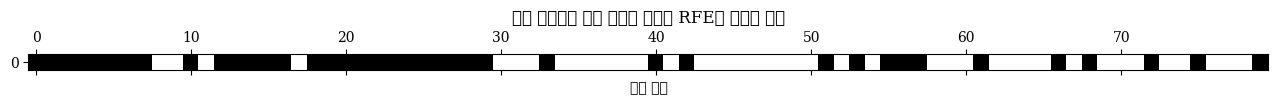

In [ ]:
# True는 검은색, False는 흰색으로 표시
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

plt.title('랜덤 포레스트 분류 모델을 사용한 RFE가 선택한 특성')
plt.xlabel('특성 번호')
plt.yticks([0])
plt.show()

In [ ]:
#
# 반복적 특성 선택 기반 성능 비교 - Logistic Regression
#

from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환: 특성 선택
X_test_rfe = select.transform(X_test)

# LogisticRegression
lr = LogisticRegression(max_iter=5000)

lr.fit(X_train_rfe, y_train)
print('반복적 특성 선택 적용(일부 특성 사용): {:.3f}'.format(lr.score(X_test_rfe, y_test)))

반복적 특성 선택 적용(일부 특성 사용): 0.947


In [ ]:
print('랜덤 포레스트(전체 특성 사용): {:.3f}'.format(select.score(X_test, y_test)))

랜덤 포레스트(전체 특성 사용): 0.972
